In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Preparing the DataFrame

In [2]:
data=pd.read_csv("Survey_FinalList.csv")
data.drop(['Timestamp'],axis=1,inplace=True)
df=pd.DataFrame(data)

In [3]:
def calc_EI(row):
    x=row[0:20]
    score=0
    for i in x:
        if(i==3):
            score=score+5
        if(i==2):
            score=score+3
        if(i==1):
            score=score+1
    return pd.Series({'EI_Score': score})

In [4]:
df1=df.apply(calc_EI,axis=1)

#Creating final required DataFrame
Final_df=pd.DataFrame(df1)

In [5]:
#DataFrame for social personality
dfs=pd.DataFrame(df.iloc[:,20:32])

In [6]:
def calc_intro(row):
    step1=0
    step2=0
    for i in range(12):
        if(i==0 or i==2):
            step1+=row[i]
        else:
            step2+=row[i]
    score=12-step1+step2
    return pd.Series({'Introversion Score': score})

In [7]:
df2=dfs.apply(calc_intro,axis=1)
#Adding to the final DataFrame
Final_df['Introversion Score']=df2    

In [8]:
#DataFrame for learning
df_l=pd.DataFrame(df.iloc[:,32:])

In [9]:
def calc_learn(row):
    noa=0
    nob=0
    noc=0
    res=''
    for i in row:
        if(i=='a'):
            noa+=1
        if(i=='b'):
            nob+=1
        if(i=='c'):
            noc+=1
    if(noa>nob and noa>noc):
        res='Visual'
    elif(nob>noa and nob>noc):
        res='Auditory'
    elif(noc>noa and noc>nob):
        res='Kinesthetic'
    elif(noa==nob):
        res='Both visual and auditory'	
    elif(noa==noc):
        res='Both visual and kinesthetic'
    elif(nob==noc):
        res='Both auditory and kinesthetic'
    return pd.Series({'Learn Style': res})

In [10]:
s1=df_l.apply(calc_learn,axis=1)
#Final DataFrame ready
Final_df['Learning Style']=s1

## Statistical Analysis

In [11]:
ei=np.array(Final_df['EI_Score'])                 # making a numpy array 
intro=np.array(Final_df['Introversion Score'])    # making a numpy array

In [12]:
r = np.corrcoef(ei,intro)
r

array([[1.00000000e+00, 8.95650761e-04],
       [8.95650761e-04, 1.00000000e+00]])

## Data Visualization

### Scatter Plot for EI scores and Introversion scores

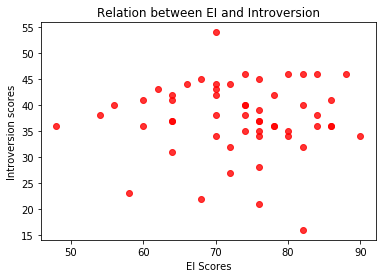

In [13]:
plt.scatter(ei, intro,c="red", alpha=0.8)
plt.title('Relation between EI and Introversion')
plt.xlabel('EI Scores')
plt.ylabel('Introversion scores')
plt.show()

### Barplot for Learning Style Frequency

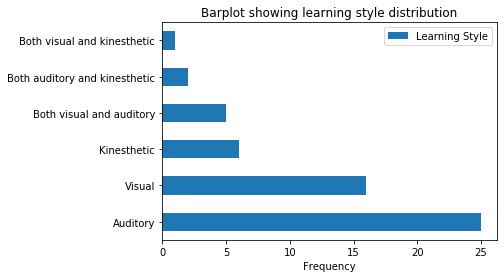

In [14]:
Freq=Final_df['Learning Style'].value_counts()
top=['Auditory','Visual','Kinesthetic','Both visual and auditory','Both auditory and kinesthetic','Both visual and kinesthetic']

x=pd.DataFrame(Freq)

index_name=x.index.tolist()
for i in top:
    if i not in index_name:
        x.loc[i]=[0]

x.plot(kind='barh')
plt.title('Barplot showing learning style distribution')
plt.xlabel('Frequency')
plt.show()

### Plot for displaying relationship between learning style and EI score

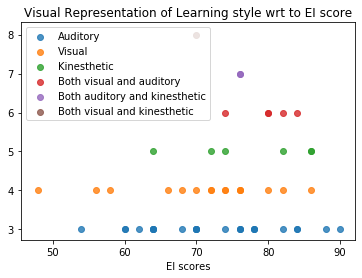

In [15]:
w=Final_df
w.drop(['Introversion Score'],axis=1,inplace=True)
w.set_index('Learning Style',inplace=True)

for i in top:
    if i not in w.index:
        w.loc[i]=[0]

g1=np.array(w.loc['Auditory','EI_Score'])
g2=np.array(w.loc['Visual','EI_Score'])
g3=np.array(w.loc['Kinesthetic','EI_Score'])
g4=np.array(w.loc['Both visual and auditory','EI_Score'])
g5=np.array(w.loc['Both auditory and kinesthetic','EI_Score'])
g6=np.array(w.loc['Both visual and kinesthetic','EI_Score'])


g11=(g1,[3]*(g1.size))
g12=(g2,[4]*(g2.size))
g13=(g3,[5]*(g3.size))
g14=(g4,[6]*(g4.size))
g15=(g5,[7]*(g5.size))
g16=(g6,[8]*(g6.size))
data = (g11,g12,g13,g14,g15,g16)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for data, group in zip(data, top):
    x, y = data
    ax.scatter(x, y, alpha=0.8, label=group)

plt.title('Visual Representation of Learning style wrt to EI score')
plt.legend(loc=2)
plt.xlabel('EI scores')
plt.show()